In [2]:
import ember
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier

emberData = "C:\\Users\\cosbyd\\OneDrive - purdue.edu\\Documents\\ember2018"

In [3]:
#create the train/test split (change PATH to where teh ember2018 file is stored tho)
#returns 4 np array (x/y  train and x/y test)
X_train, y_train, X_test, y_test = ember.read_vectorized_features(emberData)

In [4]:
#filter out any data that has a label of -1. These are the files that aren't classified where 0/1 is using to say if its either benign or malware
train_rows = (y_train != -1)
X = X_train[train_rows]
Y = y_train[train_rows]

#Normalize data between 0-1 for better output
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

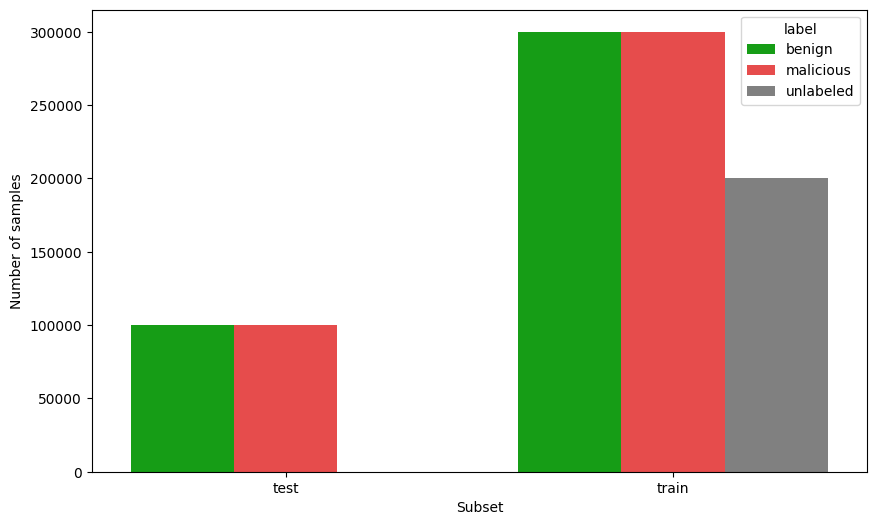

In [4]:
emberdf = ember.read_metadata(emberData)
plotdf = emberdf.copy()
plotdf['label'] = plotdf['label'].map({-1: 'unlabeled', 0: 'benign', 1: 'malicious'})
gbdf = plotdf.groupby(["label", "subset"]).count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='subset', y='sha256', hue='label', data=gbdf, palette=["#00b300", "#ff3333", "#808080"])
plt.xlabel('Subset')
plt.ylabel('Number of samples')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)


# Define the model
model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

# Train the model
model.fit(X_train, Y_train)

In [ ]:
from joblib import dump

# save the model to disk
filename = 'RFModel.joblib'
dump(model, filename)

NameError: name 'model' is not defined

#### Analysis of Model

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from keras.models import load_model
import ember
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [ ]:
# Use the model to make predictions on the validation data
Y_val_pred = model.predict(X_val)

# Compute the accuracy of the model on the validation data
accuracy = accuracy_score(Y_val, Y_val_pred)
print('Validation Accuracy:', accuracy)

Validation Accuracy: 0.9990888888888889


In [ ]:
from joblib import load

# load the model from disk
model = load('RFModel.joblib')

y_pred = model.predict(X_test_scaled).ravel()

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

[[95588  4412]
 [44551 55449]]
[[0.95588 0.04412]
 [0.44551 0.55449]]


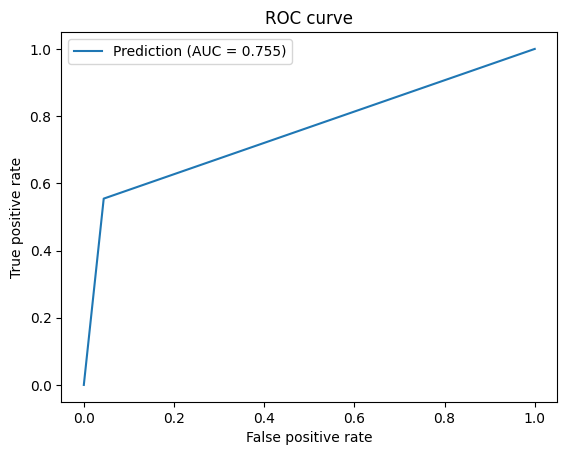

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr,tpr)

line = plt.plot(fpr, tpr, label='Prediction (AUC = {:.3f})'.format(auc))
yvalues = line[0].get_ydata()
xvalues = line[0].get_xdata()
idx = np.abs(xvalues - 0.01).argmin()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()